In [17]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['font.size'] =25
mpl.rcParams['axes.titlesize']=25
mpl.rcParams['axes.labelsize'] = '25'
mpl.rcParams['legend.fontsize'] = 25 #30
mpl.rcParams['lines.linewidth'] = 5
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25

In [9]:

p_control = os.path.join('output','389ppm_control_Res1yr_D1I_BernSCM_t_f_CS30.dat')
p_pulse = os.path.join('output','389ppm_Pulse100GtC_Res1yr_D1I_BernSCM_t_f_CS30.dat')
df_p = pd.read_csv(p_pulse, skiprows=131, delim_whitespace=True).set_index('#time')
df_c = pd.read_csv(p_control, skiprows=131, delim_whitespace=True).set_index('#time')
   

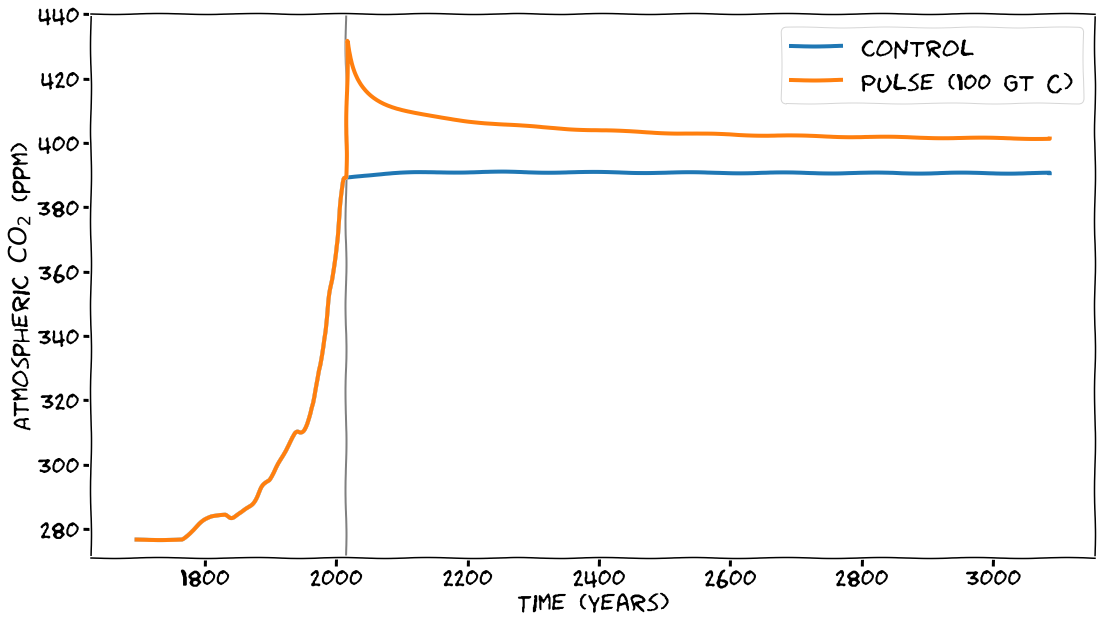

In [31]:
prop = fm.FontProperties(fname='Humor-Sans.ttf', size=16)
with plt.xkcd(scale=0.5):
    fig = plt.figure(figsize=(18,10))
    df_c.co2_atm.plot(label='control', lw=4)
    
    
    plt.axvline(2014, color='grey', zorder=0)
    
    plt.xlabel('Time (years)')
    plt.ylabel(r'Atmospheric $CO_2$ (ppm)')
    plt.legend()
    plt.ylim(None, 440)
    plt.savefig(os.path.join('plots','schema_control.png'),dpi=300)
    
    df_p.co2_atm.plot(label='Pulse (100 Gt C)', lw=4)
    plt.legend()
    plt.xlabel('Time (years)')
    plt.savefig(os.path.join('plots','schema_pulse.png'),dpi=300)

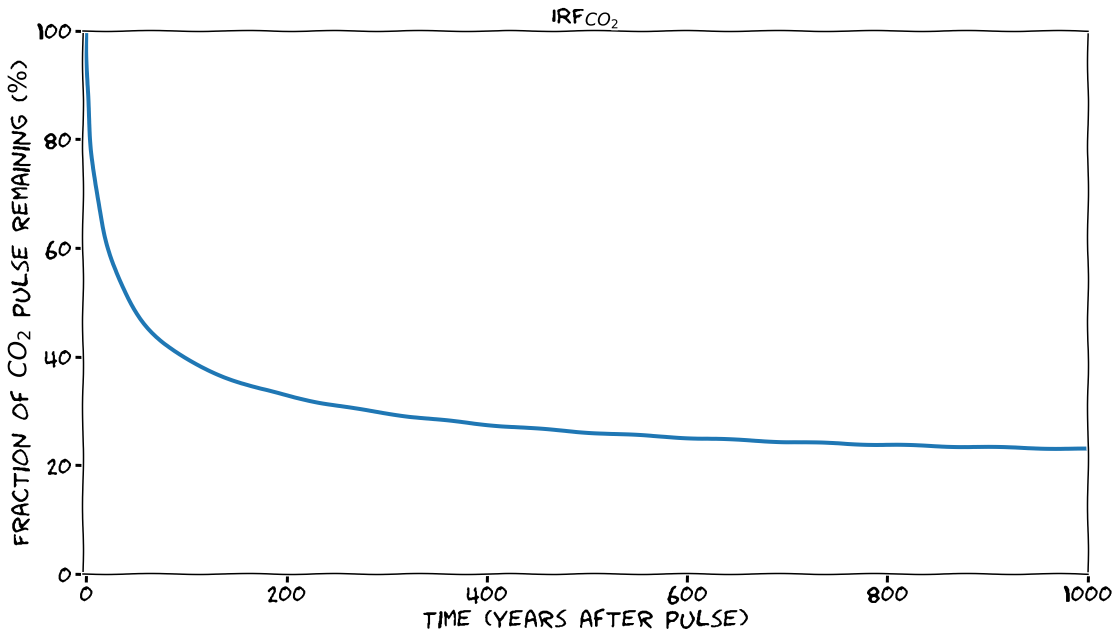

In [82]:
irf = (df_p.co2_atm-df_c.co2_atm)/(100/2.123)
irf = irf.loc[2016:]
irf.index = irf.index-2016
irf.iloc[0]=1
with plt.xkcd(scale=0.5):
    fig = plt.figure(figsize=(18,10))
    (irf*100).plot(lw=4)
    plt.xlim(-3,1000)
    plt.ylim(0,100)
    plt.ylabel(r'Fraction of $CO_2$ pulse remaining ($\%$)')
    plt.xlabel('Time (Years after pulse)')
    plt.title(r'IRF$_{CO_2}$')
    plt.savefig(os.path.join('plots','IRF.png'),dpi=300)

<AxesSubplot:xlabel='#time'>

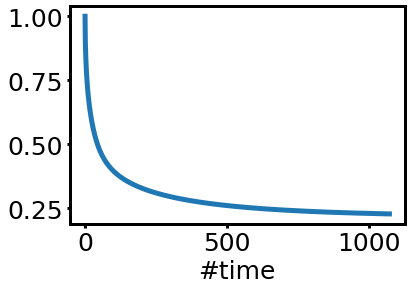